## Importation des donées à entraîner

In [3]:
# import modules
import pandas as pd
import numpy as np

In [2]:
# dataframe
df = pd.read_excel("../corpus/all_questions.xlsx")
df.head()

,id,previous_5_turn,question,next_5_turn,categorie,annotateur,commentaire,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,#spk4 : monsieur,#spk4 : depuis combien de temps habitez-vous O...,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,préparé,Valentin,NaN,NaN,NaN,préparé,spontané,non-question,poubelle
1,2,#spk4 : monsieur | #spk4 : depuis combien de t...,#spk4 : vous vous plaisez à Orléans ?,#spk4 : pourquoi ça ? | #spk1 : bah parce que ...,préparé,Valentin,NaN,NaN,NaN,494,745,292,262
2,3,#spk4 : monsieur | #spk4 : depuis combien de t...,#spk4 : pourquoi ça ?,#spk1 : bah parce que // j'ai // j'ai toujours...,spontané,Valentin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,#spk4 : et est-ce que vous comptez rester à O...,#spk1 : oh je suis obligé par ma profession | ...,préparé,Valentin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,#spk1 : bah parce que // j'ai // j'ai toujours...,#spk4 : et qu'est ce que vous faites comme tra...,#spk1 : je suis contrôleur divisionnaire aux P...,spontané,Valentin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# étiquettes questions
df["categorie"].unique()

array(['préparé', 'spontané', 'non-question', 'poubelle', nan],
      dtype=object)

In [4]:
# deux colonnes index: il faut en supprimer une
df.reset_index(drop=True, inplace=True)
df = df.drop("id", axis=1)

In [5]:
# suppression des colonnes inutiles
df = df.drop(df.filter(regex=("Unnamed:|commentaire")), axis=1)
df = df.fillna(0)

# supression des #spk :
for i in range(len(df["question"])):
    df["question"][i] = df["question"][i][8:]
df.head()

,previous_5_turn,question,next_5_turn,categorie,annotateur
0,#spk4 : monsieur,depuis combien de temps habitez-vous Orléans ?,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,préparé,Valentin
1,#spk4 : monsieur | #spk4 : depuis combien de t...,vous vous plaisez à Orléans ?,#spk4 : pourquoi ça ? | #spk1 : bah parce que ...,préparé,Valentin
2,#spk4 : monsieur | #spk4 : depuis combien de t...,pourquoi ça ?,#spk1 : bah parce que // j'ai // j'ai toujours...,spontané,Valentin
3,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,et est-ce que vous comptez rester à Orléans ?,#spk1 : oh je suis obligé par ma profession | ...,préparé,Valentin
4,#spk1 : bah parce que // j'ai // j'ai toujours...,et qu'est ce que vous faites comme travail ?,#spk1 : je suis contrôleur divisionnaire aux P...,spontané,Valentin


In [6]:
ann = df["annotateur"] != 0
miss_ann = np.sum(ann)
print(f"Dans ce corpus, on a un total de {miss_ann} questions non annotées par un annotateur.")
df = df[ann]

Dans ce corpus, on a un total de 1948 questions non annotées par un annotateur.


In [7]:
# enlever les donnees inutiles
df = df.drop(df.filter(regex=("annotateur")), axis=1)
df = df.fillna(0)
df

,previous_5_turn,question,next_5_turn,categorie
0,#spk4 : monsieur,depuis combien de temps habitez-vous Orléans ?,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,préparé
1,#spk4 : monsieur | #spk4 : depuis combien de t...,vous vous plaisez à Orléans ?,#spk4 : pourquoi ça ? | #spk1 : bah parce que ...,préparé
2,#spk4 : monsieur | #spk4 : depuis combien de t...,pourquoi ça ?,#spk1 : bah parce que // j'ai // j'ai toujours...,spontané
3,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,et est-ce que vous comptez rester à Orléans ?,#spk1 : oh je suis obligé par ma profession | ...,préparé
4,#spk1 : bah parce que // j'ai // j'ai toujours...,et qu'est ce que vous faites comme travail ?,#spk1 : je suis contrôleur divisionnaire aux P...,spontané
...,...,...,...,...
4302,#spk1 : et euh vous alliez à l'école à pieds o...,et est-ce que il y a un un souvenir euh que v...,#spk1 : est-ce qu'il y a un chose une chose q...,préparé
4303,#spk1 : et euh vous alliez à l'école à pieds o...,est-ce qu'il y a un chose une chose qui vous ...,#spk2 : moi un très bon souvenir enfin justeme...,préparé
4304,#spk1 : et euh vous alliez à l'école à pieds o...,et un très mauvais souvenir est-ce que vous av...,#spk2 : de l'école primaire non. non non vraim...,préparé
4305,#spk2 : oui j'allais à l'école à pieds j'étais...,et et qu'est-ce que vous faisiez après l'écol...,#spk1 : euh à quelle heure vous commenciez le...,préparé


In [8]:
# sauvegarde au format csv
df.reset_index(drop=True, inplace=True)
df.to_csv("../corpus_clean.csv")

In [9]:
# deux sous corpus
prep = df[df["categorie"] == "préparé"]
df.reset_index(drop=True, inplace=True)
df.to_csv("../corpus_prep.csv")
spon = df[df["categorie"] == "spontané"]
df.reset_index(drop=True, inplace=True)
df.to_csv("../corpus_spon.csv")

---
## Prétraitement des textes et verctorisations

In [33]:
# Charger les donnees
data = pd.read_csv("../corpus_clean.csv")
data

,Unnamed: 0,previous_5_turn,question,next_5_turn,categorie
0,0,#spk4 : monsieur,depuis combien de temps habitez-vous Orléans ?,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,préparé
1,1,#spk4 : monsieur | #spk4 : depuis combien de t...,vous vous plaisez à Orléans ?,#spk4 : pourquoi ça ? | #spk1 : bah parce que ...,préparé
2,2,#spk4 : monsieur | #spk4 : depuis combien de t...,pourquoi ça ?,#spk1 : bah parce que // j'ai // j'ai toujours...,spontané
3,3,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,et est-ce que vous comptez rester à Orléans ?,#spk1 : oh je suis obligé par ma profession | ...,préparé
4,4,#spk1 : bah parce que // j'ai // j'ai toujours...,et qu'est ce que vous faites comme travail ?,#spk1 : je suis contrôleur divisionnaire aux P...,spontané
...,...,...,...,...,...
1943,1943,#spk1 : et euh vous alliez à l'école à pieds o...,et est-ce que il y a un un souvenir euh que v...,#spk1 : est-ce qu'il y a un chose une chose q...,préparé
1944,1944,#spk1 : et euh vous alliez à l'école à pieds o...,est-ce qu'il y a un chose une chose qui vous ...,#spk2 : moi un très bon souvenir enfin justeme...,préparé
1945,1945,#spk1 : et euh vous alliez à l'école à pieds o...,et un très mauvais souvenir est-ce que vous av...,#spk2 : de l'école primaire non. non non vraim...,préparé
1946,1946,#spk2 : oui j'allais à l'école à pieds j'étais...,et et qu'est-ce que vous faisiez après l'écol...,#spk1 : euh à quelle heure vous commenciez le...,préparé


In [34]:
# vérifier si les données manuqantes
data.isnull().sum()

Unnamed: 0         0
previous_5_turn    0
question           0
next_5_turn        0
categorie          0
dtype: int64

In [1]:
import nltk 
import re

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("french")
import string
stopword = set(stopwords.words('french'))
stopword = set('')

[nltk_data] Downloading package stopwords to /home/zhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [36]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("french")
import string
stopword = set(stopwords.words('french'))

def clean(question):
    question = str(question).lower()
    question = re.sub('\[.*?\]','',question)
    question = re.sub('https?://\S+|www\.\S+',"",question)
    question = re.sub('<.*?>+','',question)
    question = re.sub('[%s]' % re.escape(string.punctuation),'',question)
    question = re.sub('\n','',question)
    question = re.sub('\w*\d\w*','',question)
    question = [word for word in question.split(' ') if word not in stopword]
    question = " ".join(question)
    question = [stemmer.stem(word) for word in question.split(' ')]
    question = " ".join(question)
    return question

data["question"] = data["question"].apply(clean)
data["previous_5_turn"] = data["previous_5_turn"].apply(clean)
data["next_5_turn"] = data["next_5_turn"].apply(clean)
    

[nltk_data] Downloading package stopwords to /home/zhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
clustering_data = data[["previous_5_turn","question","next_5_turn"]]
clustering_data

,previous_5_turn,question,next_5_turn
0,monsieur,depuis combien temp habitezvous orléan,oh ça fait neuf an depuis dix neuf cent soix...
1,monsieur depuis combien temp habitezvous ...,plais à orléan,pourquoi ça bah parc jai jai toujour e...
2,monsieur depuis combien temp habitezvous ...,pourquoi ça,bah parc jai jai toujour euh lorrain alo...
3,oh ça fait neuf an depuis dix neuf cent soix...,estce compt rest à orléan,oh oblig profess hm quest fait comm...
4,bah parc jai jai toujour euh lorrain alo...,quest fait comm travail,contrôleur divisionnair ptt hm hm quoi ç...
...,...,...,...
1943,euh alli lécol pied,estce a souven euh gard anné primair bon souv...,estce quil a chos chos a gard dont gard tre...
1944,euh alli lécol pied estce a souven euh ga...,estce quil a chos chos a gard dont gard tres ...,tres bon souven enfin just cest fait lécol d...
1945,euh alli lécol pied oui jall lécol pied je...,tres mauv souven estce tres mauv souven,lécol primair non non non vrai euh enseign ...
1946,oui jall lécol pied jet cinq minut pied prem...,questc fais apres lécol comment sorganis pet ...,euh quel heur commenc matin questc fais mid...


---
## Test de l'algorithme `KMeans`

In [47]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import FrenchStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

corpus = clustering_data["question"]

# application de la fonction TF-IDF
tokenizer = RegexpTokenizer(r"\w+")
stemmer = FrenchStemmer()
stopwords_fr = stopwords.words('french')
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stopwords_fr, analyzer="word", ngram_range=(1, 3), min_df=5, max_df=0.9)
X = vectorizer.fit_transform(corpus)


tf_idf = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out())


# merger avec le dataframe original
final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

1948 rows


/home/zhang/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947
combien temp,0.500637,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
depuis,0.475500,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
temp,0.440857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
combien,0.422071,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orléan,0.388283,1.0,0.0,0.580632,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [58]:
from sklearn import cluster
from sklearn.cluster import KMeans
kmeans_results = run_KMeans(2, final_df)

/home/zhang/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [61]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

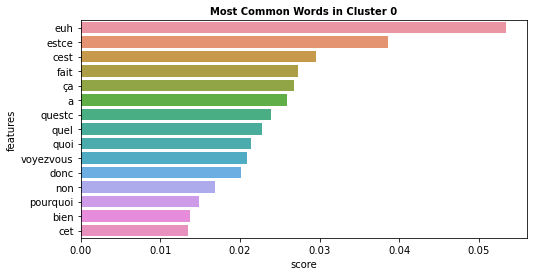

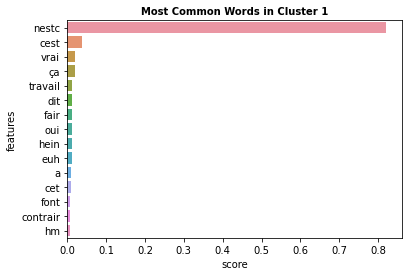

In [65]:
import seaborn as sns
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 15)

In [20]:
data["previous_5_turn"]

0                                                monsieur
1         monsieur    depuis combien temp habitezvous ...
2         monsieur    depuis combien temp habitezvous ...
3         oh ça fait neuf an depuis dix neuf cent soix...
4         bah parc  jai  jai toujour euh  lorrain  alo...
                              ...                        
1943                                  euh alli lécol pied
1944      euh alli lécol pied   estce a  souven euh ga...
1945      euh alli lécol pied   oui jall lécol pied je...
1946      oui jall lécol pied jet cinq minut pied prem...
1947      oui jall lécol pied jet cinq minut pied prem...
Name: previous_5_turn, Length: 1948, dtype: object

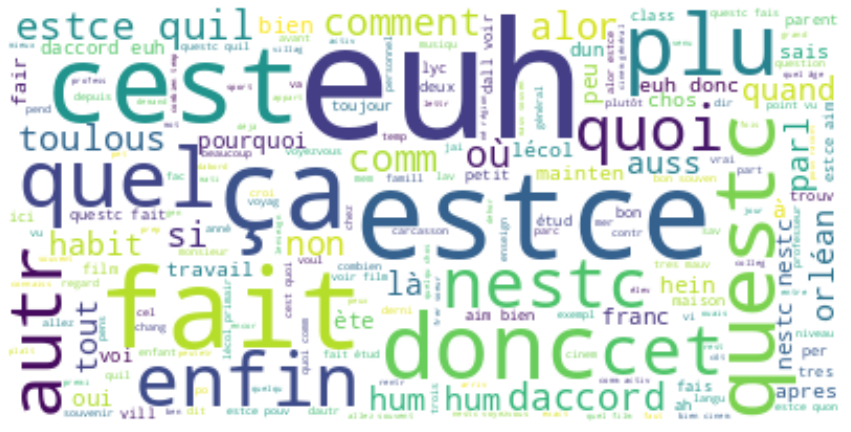

In [17]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

question = " ".join(i for i in data.question)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                      background_color = "white").generate(question)


plt.figure(figsize = (15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()